# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [166]:
import pandas as pd
import numpy as np

# read in data
bicycle_data = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
bicycle_data.head()

,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [167]:
test_data = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
test_data.head()

,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [168]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2)
weather_rawdata.head()

,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),is_day ()
0,2023-01-01T00:00,15.8,9.3,0.0,3.0,86.0,0
1,2023-01-01T01:00,15.3,8.9,0.0,3.0,80.0,0
2,2023-01-01T02:00,14.7,8.8,0.0,2.0,70.0,0
3,2023-01-01T03:00,14.3,9.0,0.0,3.0,99.0,0
4,2023-01-01T04:00,13.8,9.3,0.0,2.0,70.0,0


In [169]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()

,name,start,end
0,Christmas holiday 2022,2022-12-26,2023-01-08
1,Spring break 2023,2023-02-20,2023-02-26
2,Easter holiday 2023,2023-04-03,2023-04-16
3,Summer holiday 2023,2023-07-01,2023-08-31
4,Autumn break 2023,2023-10-30,2023-11-05


In [170]:
import datetime
school_holidays = {}
for index, row in school_holidays_data.iterrows():
    school_holidays[row['name']] = [datetime.datetime.strptime(row['start'], '%Y-%m-%d'), datetime.datetime.strptime(row['end'], '%Y-%m-%d')]

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [171]:
import holidays
from datetime import timedelta

weather_data = weather_rawdata.copy()
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data['weekday'] = date_time.dt.strftime('%A')
weather_data['hour'] = date_time.dt.hour
weather_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
weather_data['is_weekend'] = (weather_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
belgian_holidays = holidays.Belgium(years=2023)
weather_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
weather_data['next_day'] = date_time + timedelta(days=1)
weather_data['prev_day'] = date_time - timedelta(days=1)
weather_data['is_bridge_day'] = (weather_data['weekday'].isin(["Monday", "Friday"]) & weather_data['next_day'].dt.date.isin(belgian_holidays) | weather_data['prev_day'].dt.date.isin(belgian_holidays)).astype(int)
is_school_holiday = [0] * len(date_time)
for i, check_date in enumerate(date_time):
    for holiday, date_range in school_holidays.items():
        start_date = date_range[0]
        end_date = date_range[1]
        if start_date <= check_date <= end_date:
            is_school_holiday[i] = 1
weather_data["is_school_holiday"] = is_school_holiday


weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,is_weekend,is_public_holiday,next_day,prev_day,is_bridge_day,is_school_holiday
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,1,1,2023-01-02 00:00:00,2022-12-31 00:00:00,0,1
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,1,1,2023-01-02 01:00:00,2022-12-31 01:00:00,0,1
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,1,1,2023-01-02 02:00:00,2022-12-31 02:00:00,0,1
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,1,1,2023-01-02 03:00:00,2022-12-31 03:00:00,0,1
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,1,1,2023-01-02 04:00:00,2022-12-31 04:00:00,0,1


In [172]:

dummies = pd.get_dummies(weather_data.weekday)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [173]:
weather_data = pd.concat([weather_data, dummies], axis=1)
weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,prev_day,is_bridge_day,is_school_holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,2022-12-31 00:00:00,0,1,0,0,0,1,0,0,0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,2022-12-31 01:00:00,0,1,0,0,0,1,0,0,0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,2022-12-31 02:00:00,0,1,0,0,0,1,0,0,0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,2022-12-31 03:00:00,0,1,0,0,0,1,0,0,0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,2022-12-31 04:00:00,0,1,0,0,0,1,0,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [174]:
train_data = weather_data.merge(bicycle_data, on = "Date_hour")
train_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,is_bridge_day,is_school_holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,0,1,0,0,0,1,0,0,0,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,0,1,0,0,0,1,0,0,0,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,0,1,0,0,0,1,0,0,0,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,0,1,0,0,0,1,0,0,0,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,0,1,0,0,0,1,0,0,0,155.0


The following does the same but then for the test set:

In [175]:
test_data = weather_data.merge(test_data, on = "Date_hour")
test_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,is_bridge_day,is_school_holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Id
0,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,...,0,1,0,0,1,0,0,0,0,0
1,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,...,0,1,0,0,1,0,0,0,0,1
2,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,...,0,1,0,0,1,0,0,0,0,2
3,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,...,0,1,0,0,1,0,0,0,0,3
4,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,...,0,1,0,0,1,0,0,0,0,4


In [176]:
ground_truth = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
ground_truth.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2023-01-01,0:00:00,2023-01-01T00:00:00+01:00,7.0,4.0,3.0
1,COU,Coupure-Links,2023-01-01,0:05:00,2023-01-01T00:05:00+01:00,2.0,0.0,2.0
2,COU,Coupure-Links,2023-01-01,0:10:00,2023-01-01T00:10:00+01:00,1.0,0.0,1.0
3,COU,Coupure-Links,2023-01-01,0:15:00,2023-01-01T00:15:00+01:00,8.0,4.0,4.0
4,COU,Coupure-Links,2023-01-01,0:20:00,2023-01-01T00:20:00+01:00,5.0,2.0,3.0


In [177]:
gold_data = ground_truth.copy()
gold_data["Date_hour"] = ground_truth['Ordening'].str.extract(r'^(.*?T\d{2})..')
gold_data = gold_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
gold_data = weather_data.merge(gold_data, on = "Date_hour")
gold_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,is_school_holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,1,0,0,0,1,0,0,0,2023-01-01,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,1,0,0,0,1,0,0,0,2023-01-01,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,1,0,0,0,1,0,0,0,2023-01-01,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,1,0,0,0,1,0,0,0,2023-01-01,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,1,0,0,0,1,0,0,0,2023-01-01,155.0


In [178]:
gtest_data = gold_data[(gold_data['Datum'] >= '2023-07-01') & (gold_data['Datum'] <= '2023-07-31')]
gtest_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,weekday,hour,is_school_hours,...,is_school_holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
4343,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,...,1,0,0,1,0,0,0,0,2023-07-01,150.0
4344,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,...,1,0,0,1,0,0,0,0,2023-07-01,92.0
4345,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,...,1,0,0,1,0,0,0,0,2023-07-01,49.0
4346,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,...,1,0,0,1,0,0,0,0,2023-07-01,36.0
4347,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,...,1,0,0,1,0,0,0,0,2023-07-01,57.0


## Models

### Feature Selection

In [179]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = gold_data.loc[:, gold_data.columns != "Totaal"].select_dtypes(include=np.number)
y = gold_data["Totaal"]

X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
features = ['temperature_2m', 'precipitation', 'is_day', 'is_weekend', 'hour', 'is_public_holiday', 'is_school_holiday', 'is_bridge_day'] + weekdays

In [180]:
y_train = train_data["Totaal"]
X_train = train_data.loc[:, features]

#y_train = gold_data["Totaal"]
#X_train = gold_data.loc[:, features]

y_test = gtest_data["Totaal"]
X_test = gtest_data.loc[:, features]

### Preprocessing

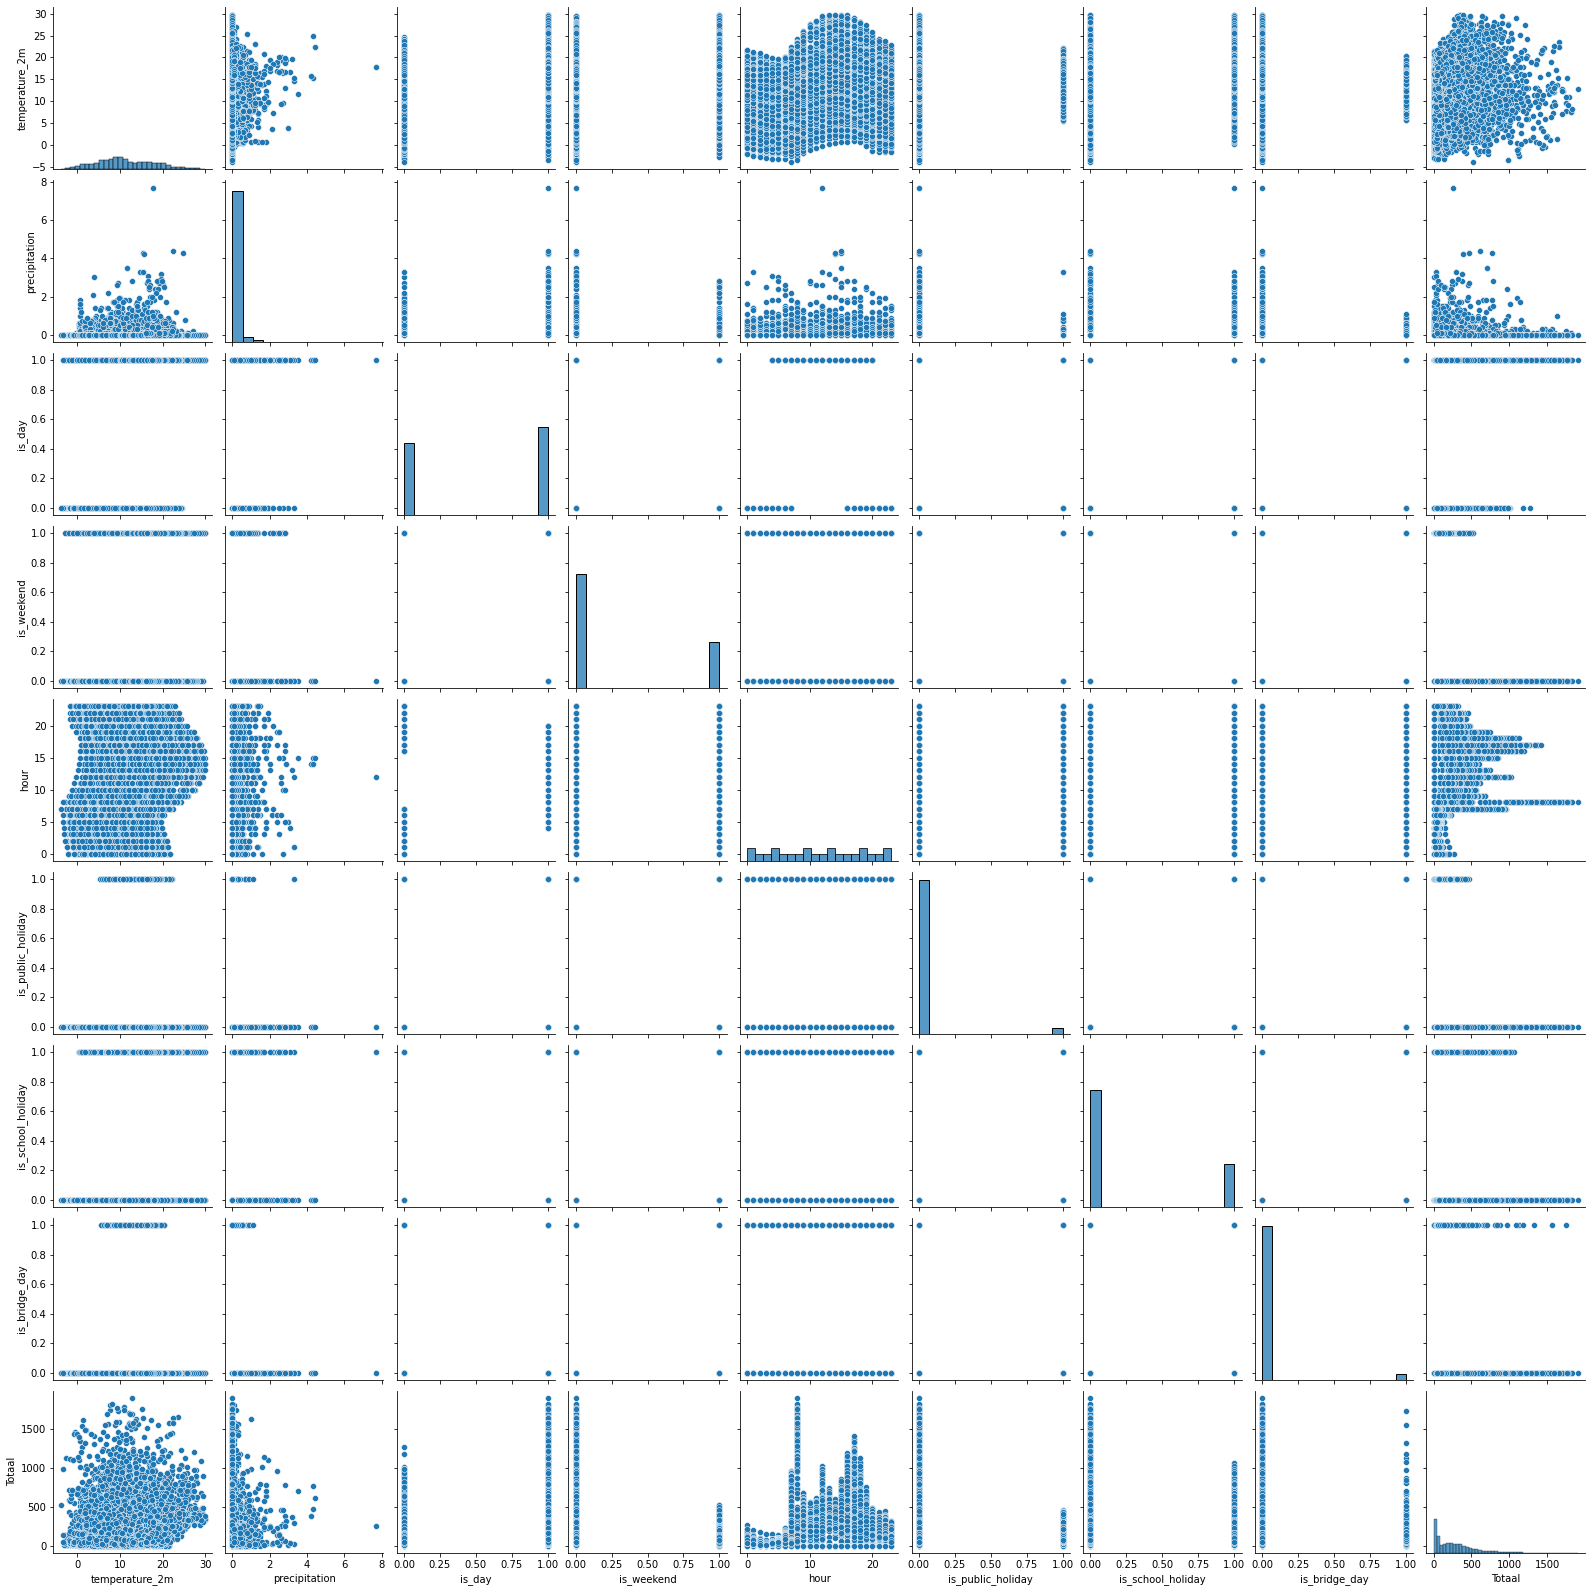

In [181]:
import seaborn as sns

plot_features = ['temperature_2m', 'precipitation', 'is_day', 'is_weekend', 'hour', 'is_public_holiday', 'is_school_holiday', 'is_bridge_day']
sns.pairplot(gold_data.loc[:,plot_features + ['Totaal']])

In [182]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

### Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LinReg = make_pipeline(StandardScaler(), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = LinReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

formula = 'Totaal ~ ' + '+'.join(features)
print(type(formula))

model = smf.ols(formula=formula, 
                data=train_data).fit()
  
# model summary 
print(model.summary()) 


Training set MSE: 61132.917244611424
Test set MSE: 22514.179356572102
Train set R²: 0.3952934129804201
Test set R²: 0.3645319018936348
<class 'str'>
                            OLS Regression Results                            
Dep. Variable:                 Totaal   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     217.7
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:45:15   Log-Likelihood:                -30094.
No. Observations:                4343   AIC:                         6.022e+04
Df Residuals:                    4329   BIC:                         6.031e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|

### Poisson Regression

In [184]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score

PoiReg = make_pipeline(StandardScaler(), PoissonRegressor()) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = PoiReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 56902.884921867895
Test set MSE: 20745.01239125956
Train set R²: 0.43713549289677256
Test set R²: 0.4144670627038194


### Ridge Regression

In [185]:
from sklearn.linear_model import Ridge 

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RidReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 61130.534398533484
Test set MSE: 22471.819692119978
Train set R²: 0.39531698330528064
Test set R²: 0.36572751355593447


### Decision Tree Regression

In [186]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = DTReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 360.5773658761225
Test set MSE: 45897.04502688172
Train set R²: 0.9964332880205438
Test set R²: -0.29545507522222336


### Random Forest Regression

In [187]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor()

RFReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RFReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RFReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RFReg.score(X_train, y_train) # Training set R²
R_test = RFReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 2843.865930956907
Test set MSE: 42635.01757455289
Train set R²: 0.9718694193151433
Test set R²: -0.20338357004888064


### Gradient Boosting Regression

In [188]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

GBReg = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss= 'huber',
                                                                  learning_rate = 0.03, # !
                                                                  n_estimators = 150,
                                                                  subsample = 1,
                                                                  criterion = 'friedman_mse',
                                                                  min_samples_split = 2,
                                                                  min_samples_leaf = 1,
                                                                  min_weight_fraction_leaf = 0,
                                                                  max_depth = 2, # !
                                                                  min_impurity_decrease = 0,
                                                                  alpha = 0.9))

GBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = GBReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = GBReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 46114.10216250358
Test set MSE: 14015.651679452581
Train set R²: 0.5438545616826789
Test set R²: 0.6044048785698629


## Submission

### Prediction

In [189]:
X = test_data.loc[:, features]

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
RidReg_predictions = RidReg.predict(X)
DTReg_predictions = DTReg.predict(X)
GBReg_predictions = GBReg.predict(X)

predictions = {"LinReg": LinReg_predictions, 
               "PoiReg": PoiReg_predictions, 
               "DTReg": DTReg_predictions, 
               "RidReg": RidReg_predictions,
               "GBReg": GBReg_predictions}

### Save results

In [190]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)